In [6]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter


subreddit = 'ukrainetest'
stop = nltk.corpus.stopwords.words('english')

In [7]:
filename = f'./data/{subreddit}_filtered.csv'
dataframe = pd.read_csv(filename)
dataframe.shape

C:\Users\1408\AppData\Local\Temp\ipykernel_10484\3418925740.py:2: DtypeWarning: Columns (86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(filename)


(25978, 89)

concatenate title with selftext

In [8]:
dataframe['title'] = dataframe['title'].apply(str) 
dataframe['selftext'] = dataframe['selftext'].apply(str) 
dataframe.loc[dataframe['selftext'].isin({ "remove", "delete", "nan"})]['selftext'] = ""
dataframe['wholetext'] = dataframe['title'] + " " + dataframe['selftext']
submissions = dataframe.wholetext
print(dataframe.wholetext)

0        why be putin attack ukraine he told us in a re...
1        what be some interest fact about ukraine hello...
2                 i be bring the peace support ukraine nan
3        on russian propaganda and far right extremism ...
4        i be born and adopt from ukraine i live in ire...
                               ...                        
25973    just earlier after six day the ukrainian air f...
25974                   all the stress be get to putin nan
25975    look like lukashenko get caught planning the i...
25976                 you can help ukrainian people remove
25977    what our society in the west can learn from uk...
Name: wholetext, Length: 25978, dtype: object


C:\Users\1408\AppData\Local\Temp\ipykernel_10484\2890766327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe['selftext'].isin({ "remove", "delete", "nan"})]['selftext'] = ""


check for sentiments

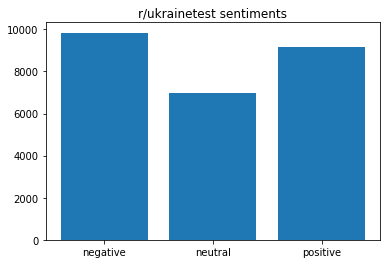

In [9]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiments = []
for submission in submissions:
    sentiment = sentiment_analyzer.polarity_scores(submission)
    if sentiment['compound'] >= 0.05:
        sentiments.append('positive')
    elif sentiment['compound'] <= -0.05:
        sentiments.append('negative')
    else :
        sentiments.append('neutral')

a = dict(Counter(sentiments))

keys = sorted(list(a.keys()))
values = []

for key in keys:
    values.append(a[key])

plt.bar(range(len(a)), values, tick_label=keys)
plt.title(f'r/{subreddit} sentiments')
plt.show()

In [5]:
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

sentiments_dict = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 
'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
from LeXmo import LeXmo

for submission in submissions:
    emo = LeXmo.LeXmo(submission)
    for key in emo.keys():
        if key != 'text':
            sentiments_dict[key] = sentiments_dict[key] + emo[key]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyboardInterrupt: 

dict_values([542.7053912744427, 456.5624894265963, 127.90561095984688, 730.4122255388575, 322.25092508328254, 934.2182681626273, 958.5754438595446, 369.88096425341337, 251.39400015698735, 630.0836380969026])


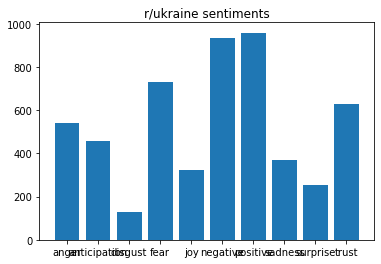

In [8]:
keys = sentiments_dict.keys()
values = sentiments_dict.values()
print(values)

plt.bar(keys, values)
plt.title(f'r/{subreddit} sentiments')
plt.show()

import pickle

with open(f'{subreddit}_sentiments.json', 'wb') as fp:
    pickle.dump(dict, fp)

In [ ]:
from textblob import TextBlob

